In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
filename="temp/page_01.jpg"

In [4]:
img =cv2.imread(filename)

In [5]:
def display(im_path):
    dpi=80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape
    figsize = width / float (dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap="gray")
    plt.show()

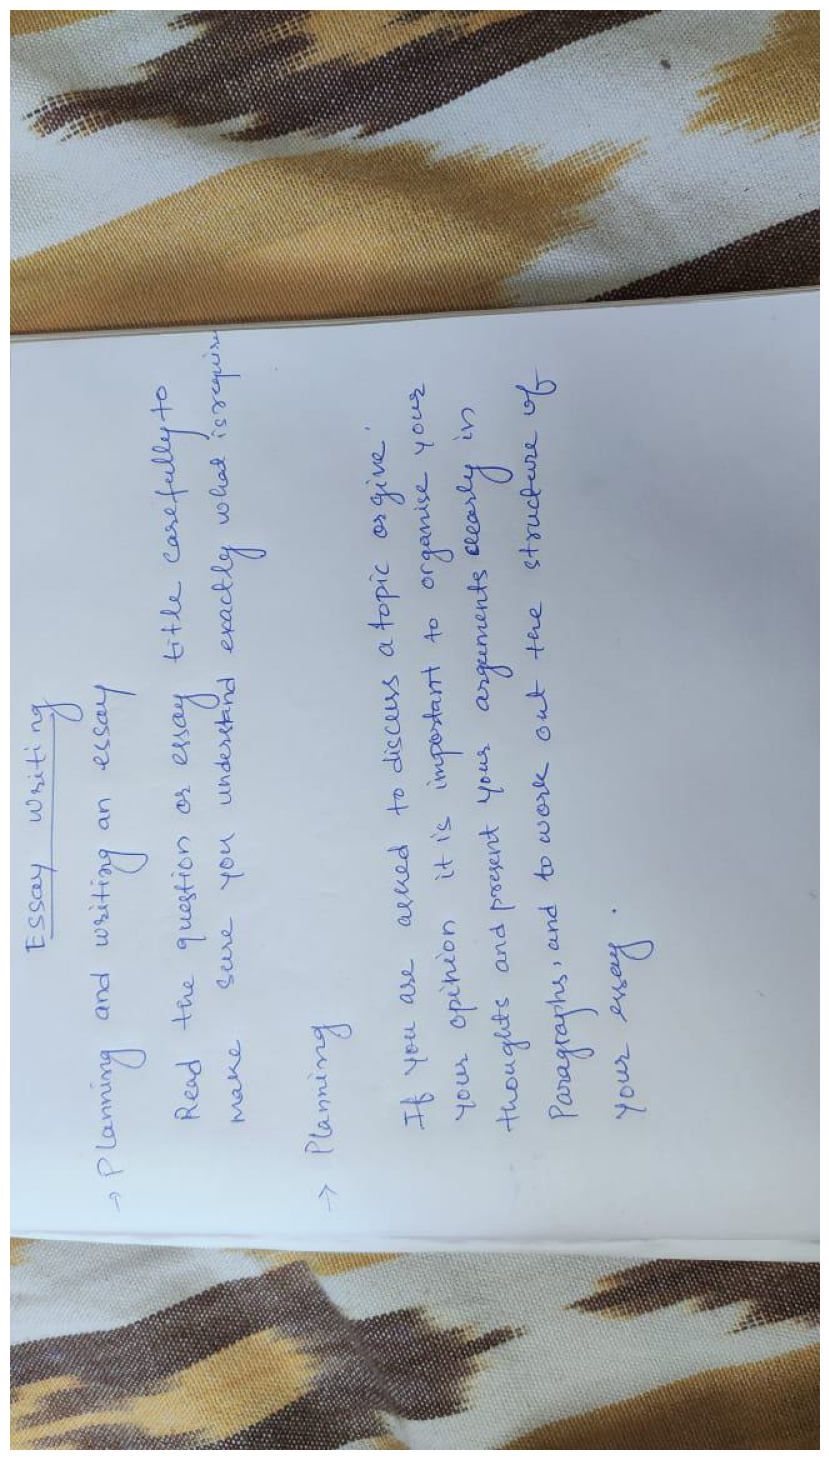

In [6]:
display(filename)

In [7]:
#invert

In [8]:
import cv2

In [9]:
from matplotlib import pyplot as plt

In [10]:
filename="temp/page_01.jpg"

In [11]:
img2 =cv2.imread(filename)

In [12]:
inverted_image =cv2.bitwise_not(img2)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

In [13]:
def display(im_path):
    dpi=80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape
    figsize = width / float (dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap="gray")
    plt.show()

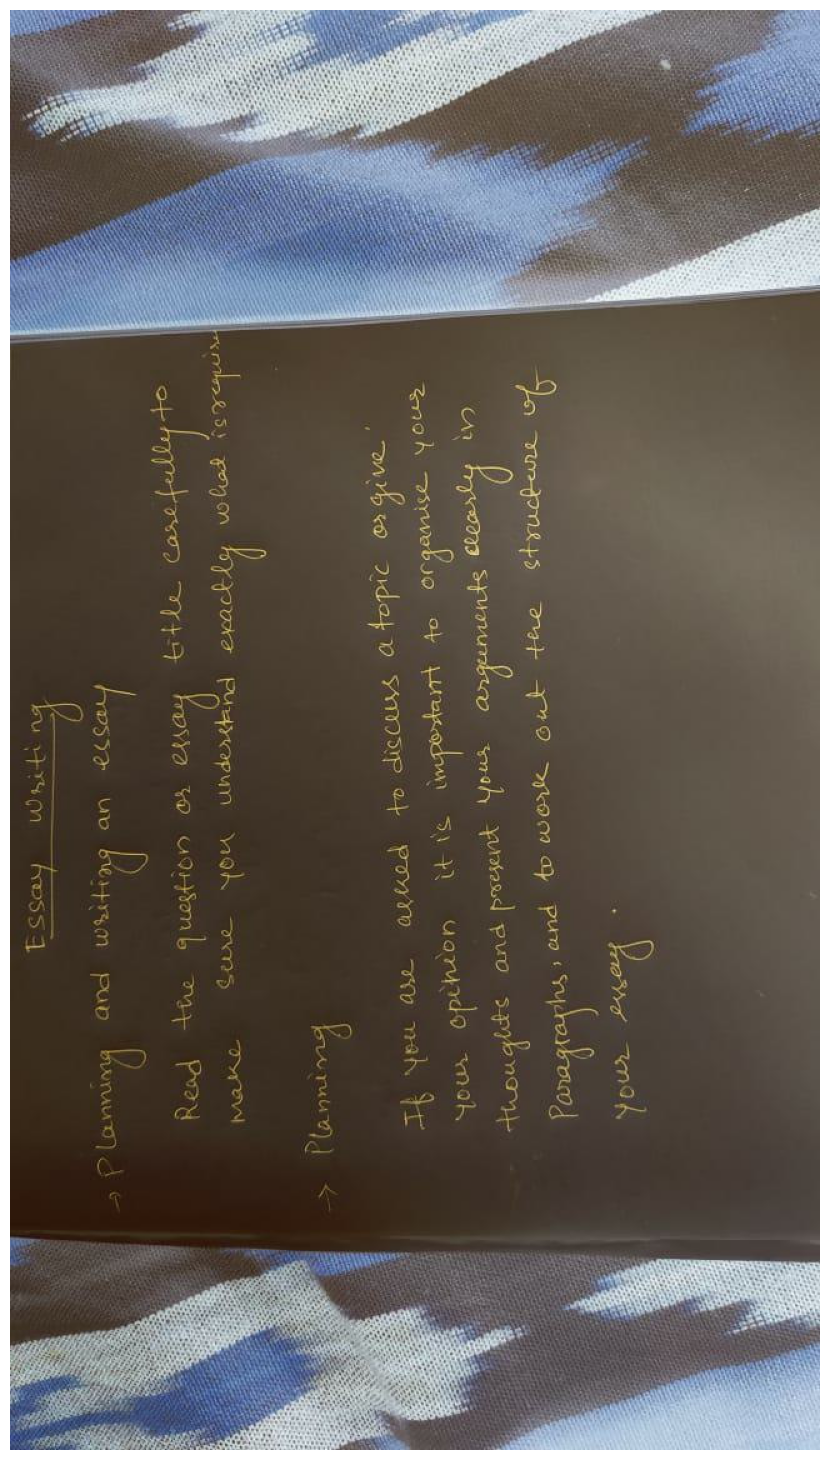

In [14]:
display("temp/inverted.jpg")

In [15]:
#binarization

In [23]:
import cv2 

In [24]:
from matplotlib import pyplot as plt
filename="temp/page_01.jpg"
img3 =cv2.imread(filename)

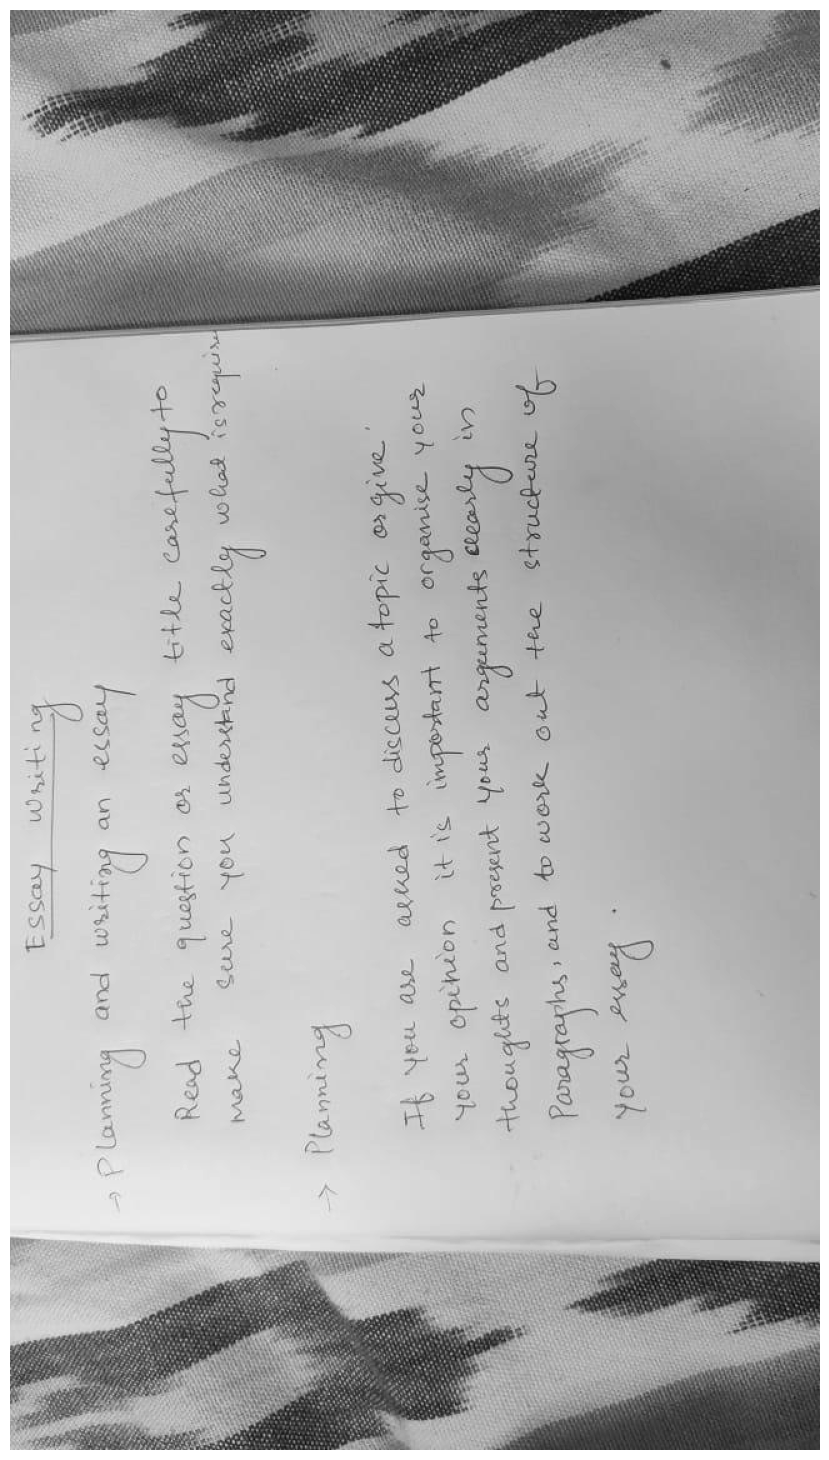

In [25]:
import matplotlib.pyplot as plt

def display(im_path):
    dpi = 80

    im_data = plt.imread(im_path)

    # Check if the image is grayscale (2 dimensions) or color (3 dimensions)
    if len(im_data.shape) == 2:
        # Grayscale image
        height, width = im_data.shape
        depth = 1  # Set depth to 1 for grayscale
    else:
        # Color image
        height, width, depth = im_data.shape

    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    # If the image is grayscale, specify the cmap as 'gray'
    if depth == 1:
        ax.imshow(im_data, cmap="gray")
    else:
        ax.imshow(im_data)

    plt.show()

# Example usage:
display("temp/gray.jpg")

In [26]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [27]:
gray=grayscale(img3)
cv2.imwrite("temp/gray.jpg", gray)

True

In [28]:
thresh, im_bw =cv2.threshold(gray, 150, 250, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

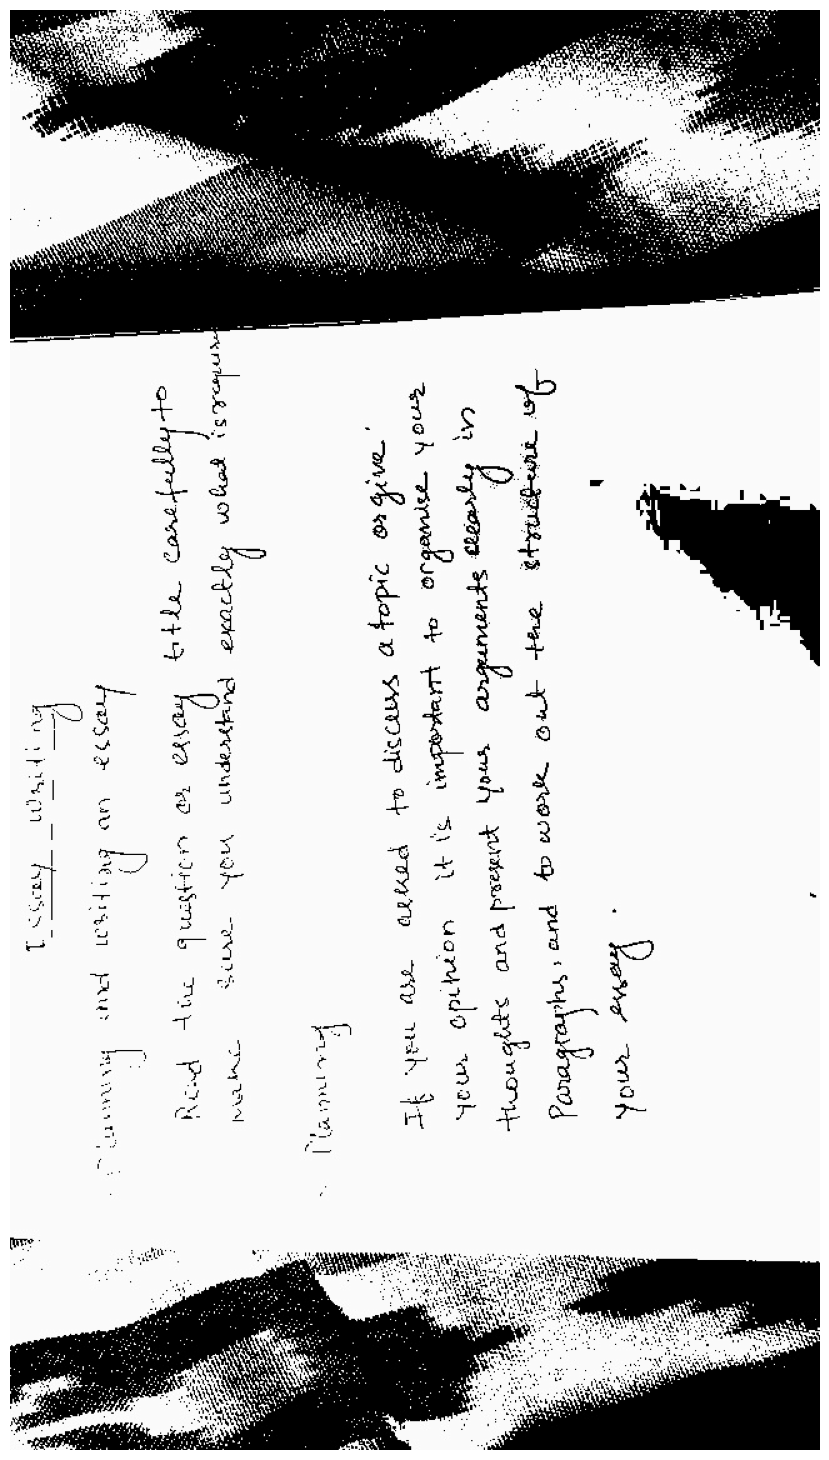

In [29]:
display("temp/bw_image.jpg")

In [30]:
def noise_removal(image):
    import numpy as np
    kernel =np.ones((1,1), np.uint8)
    image =cv2.dilate(image, kernel, iterations=1)
    kernel =np.ones((1,1), np.uint8)
    image =cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image, 3)
    return(image)

In [31]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

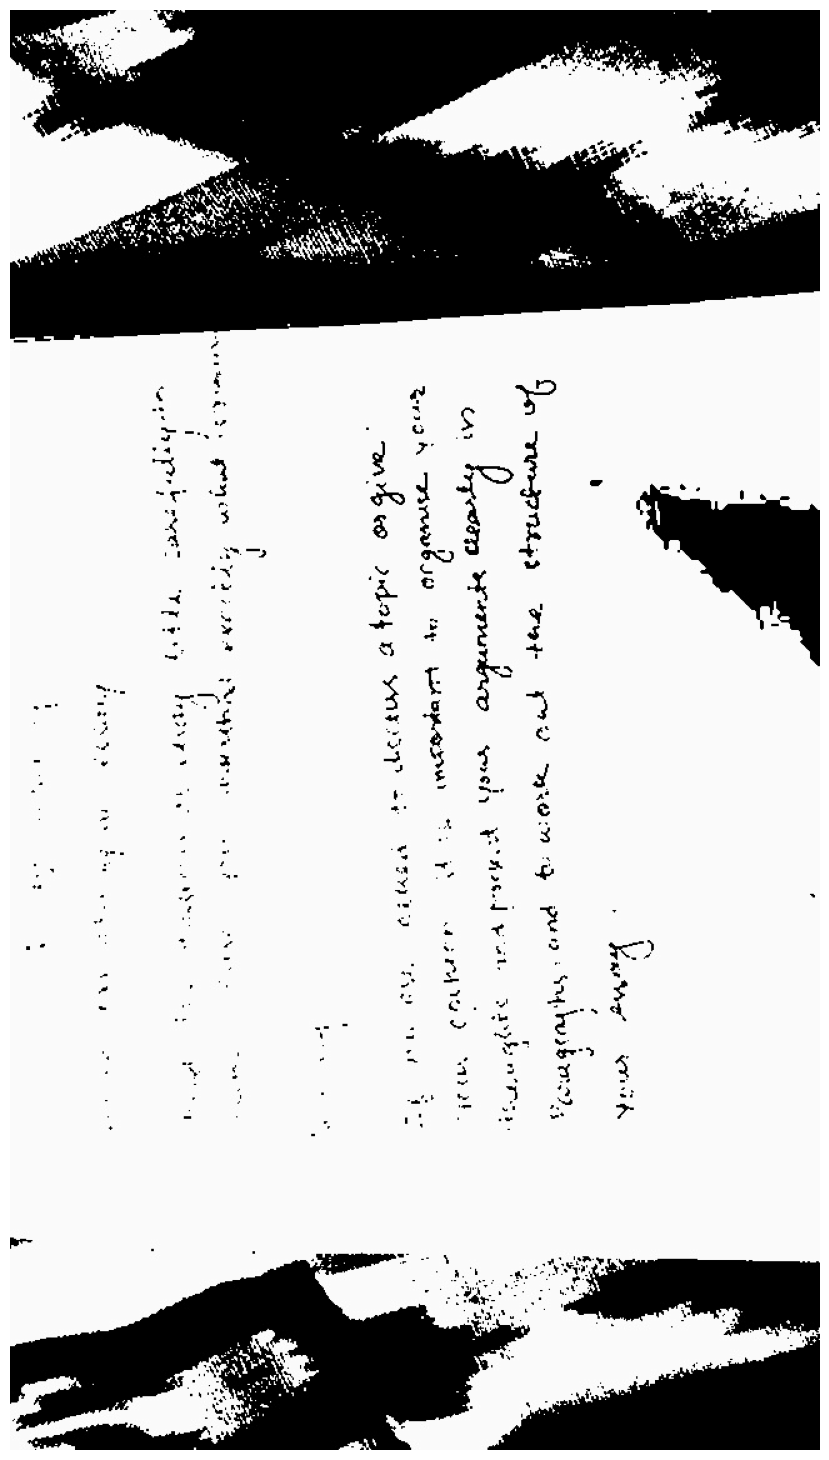

In [32]:
display("temp/no_noise.jpg")

In [33]:
def thin(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel=np.ones((2,2), np.uint8)
    image= cv2.erode(image, kernel,iterations=1)
    image =cv2.bitwise_not(image)
    return(image)

In [34]:
eroded_image = thin(no_noise)
cv2.imwrite("temp/eroded_img.jpg",eroded_image)

True

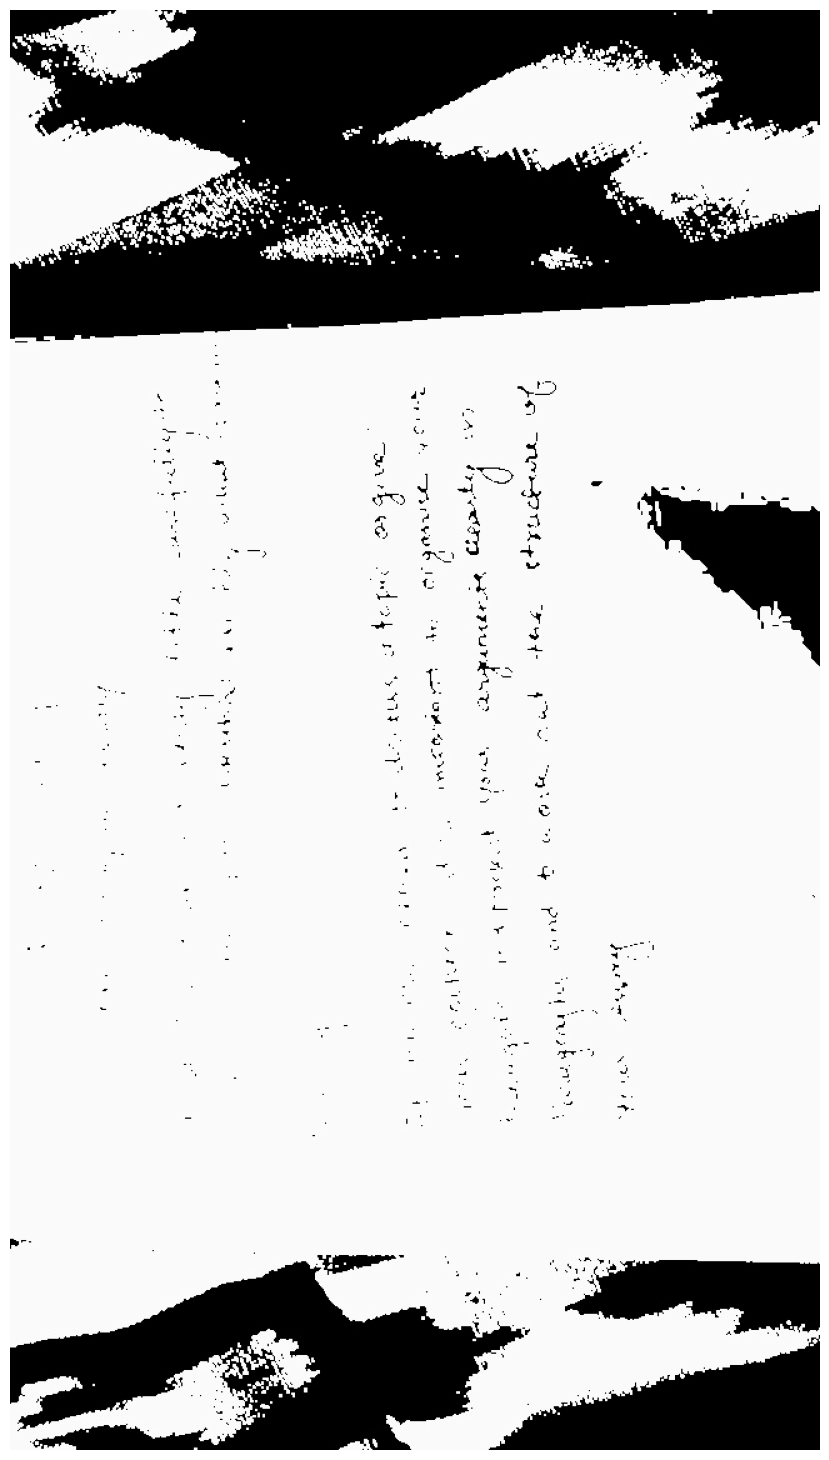

In [35]:
display("temp/eroded_img.jpg")

In [36]:
def thick(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel=np.ones((2,2), np.uint8)
    image= cv2.dilate(image, kernel,iterations=1)
    image =cv2.bitwise_not(image)
    return(image)

In [37]:
dilate_img =thick(no_noise)
cv2.imwrite("temp/dilate_img.jpg",dilate_img)

True

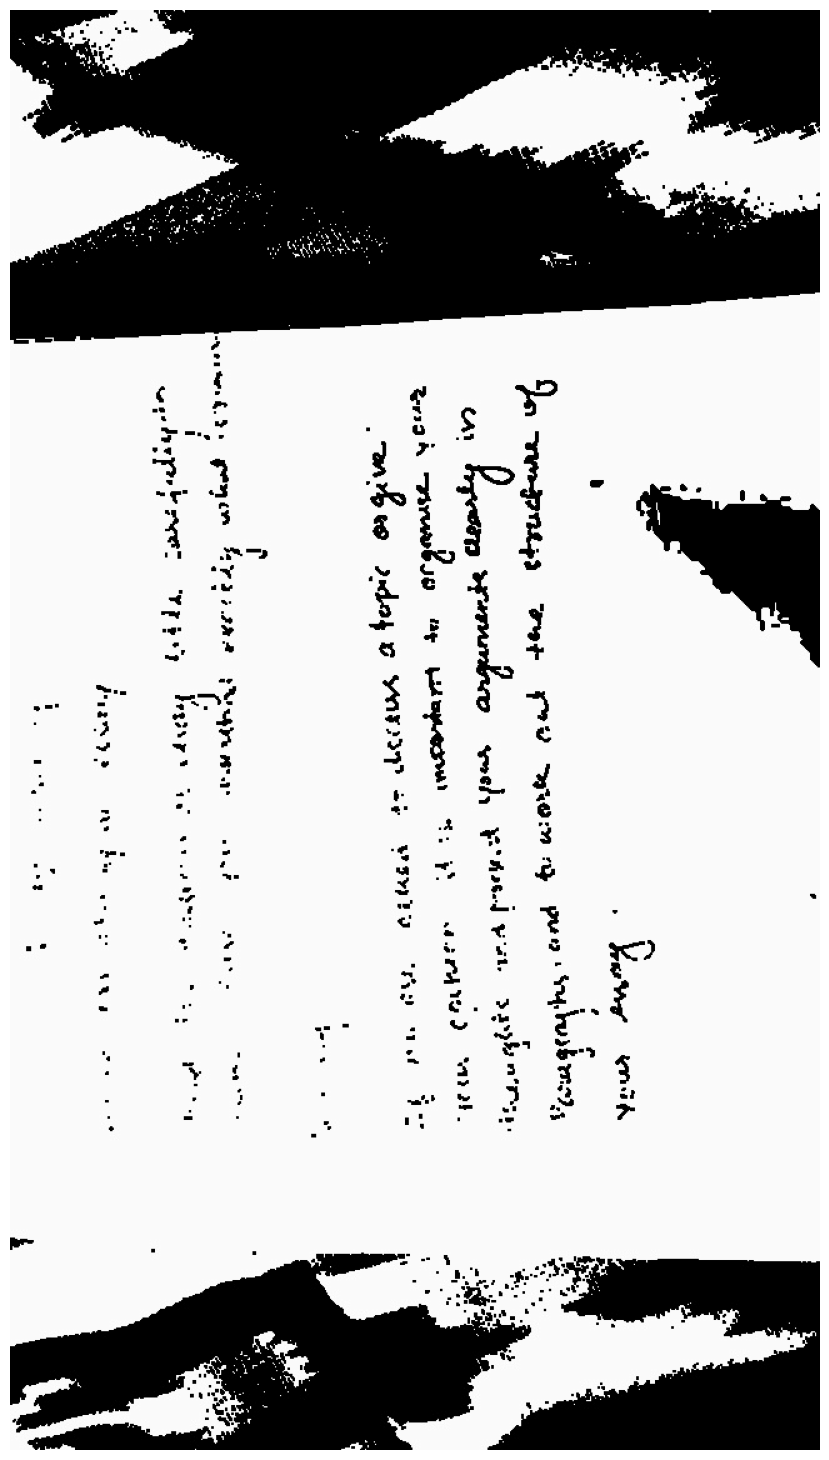

In [38]:
display("temp/dilate_img.jpg")

In [39]:
new=cv2.imread("temp/dilate_img.jpg")

In [40]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [41]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [42]:
fixed = deskew(new)
cv2.imwrite("temp/rotated_img.jpg",fixed)

True

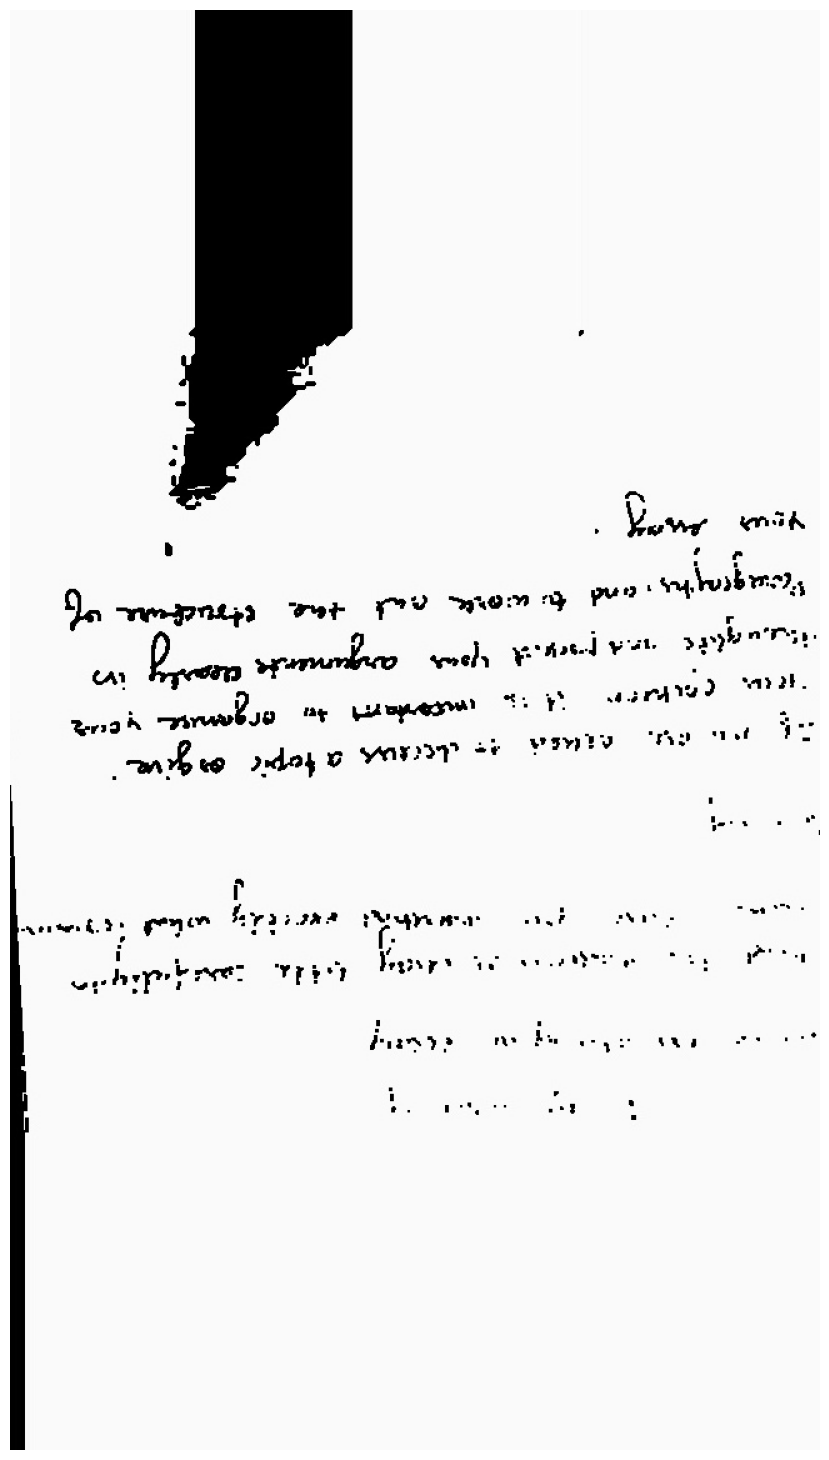

In [43]:
display("temp/rotated_img.jpg")

In [44]:
def remove_borders(image):
    contours,heiarchy =cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt =cntsSorted[-1]
    x, y, w, h =cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return(crop)

In [45]:
no_borders = remove_borders(no_noise)
cv2.imwrite("temp/no_border.jpg", no_borders)

True

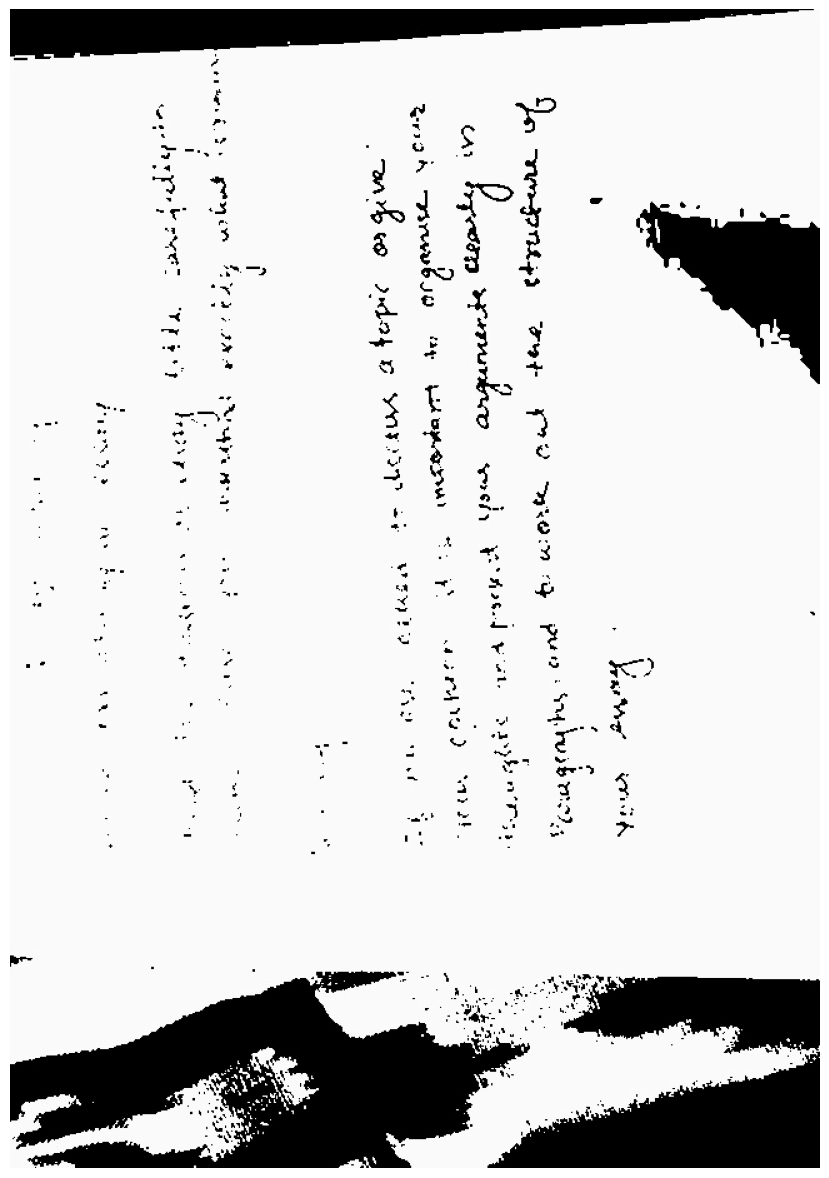

In [46]:
display("temp/no_border.jpg")

In [47]:
color =[255, 255, 255]
top,bottom,left,right =[150]*4

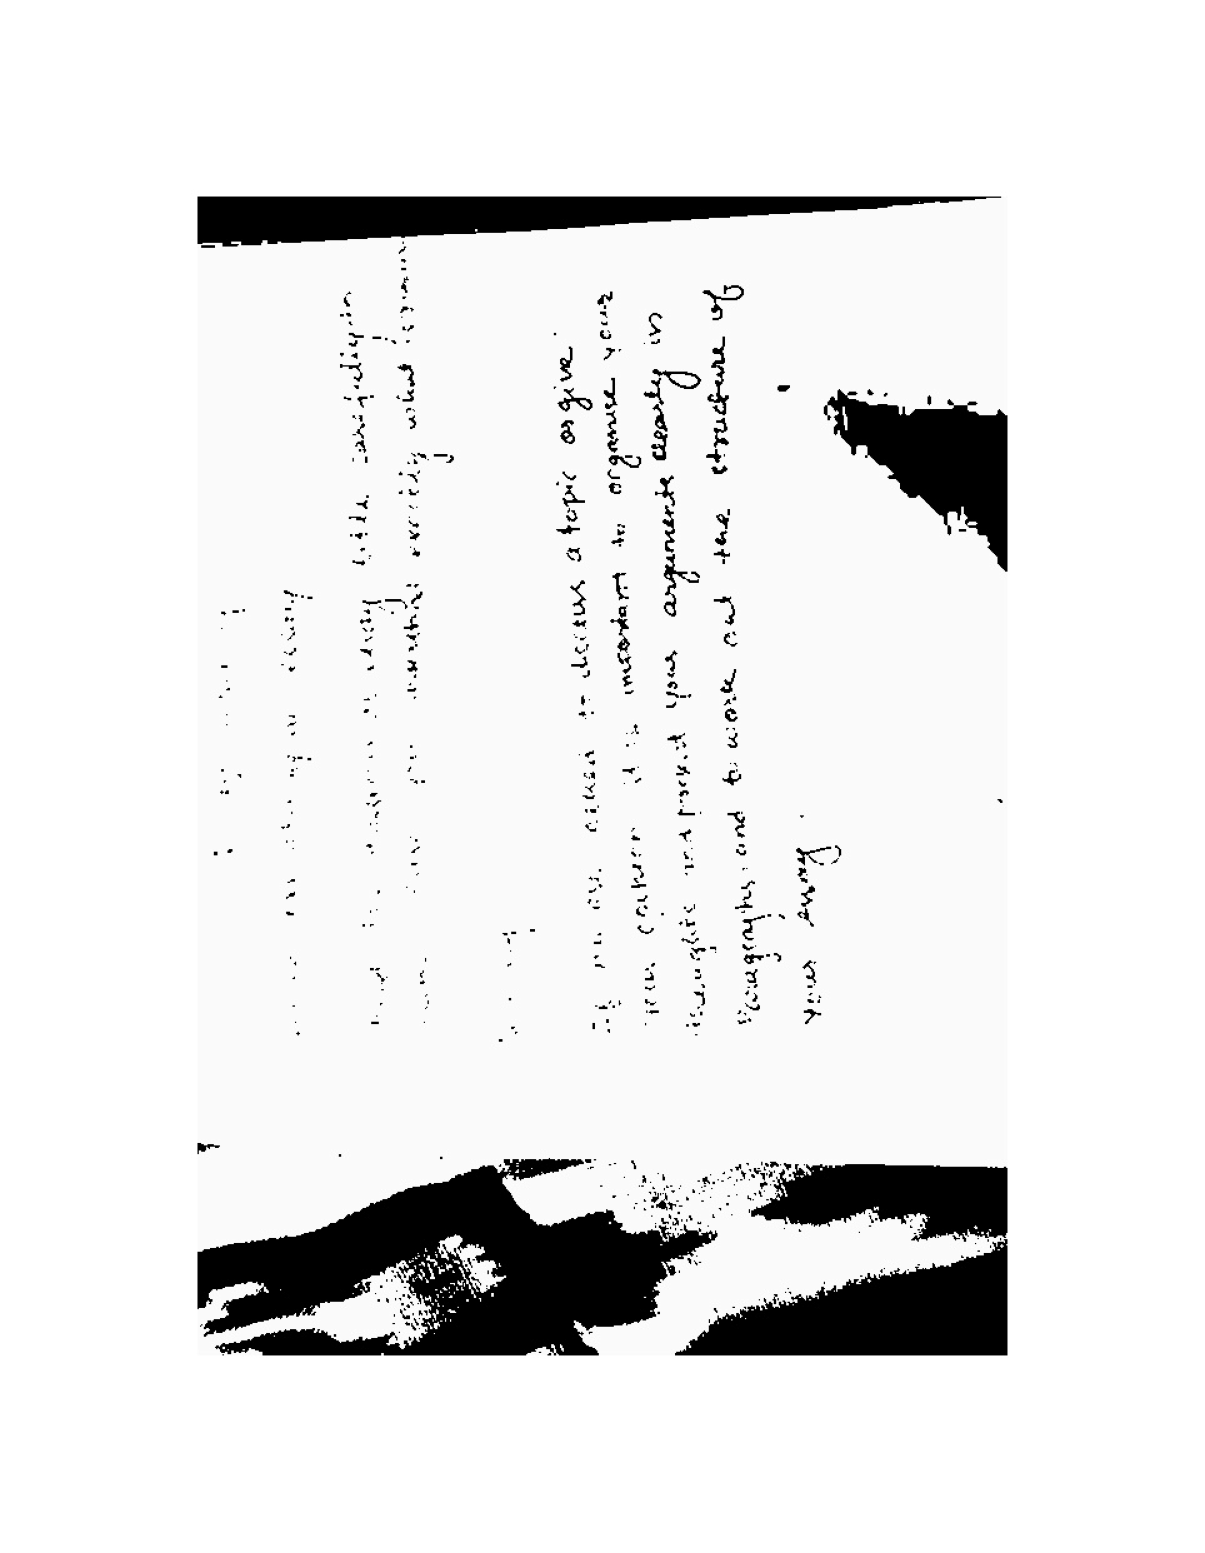

In [48]:
image_with_border =cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/border_img.jpg", image_with_border)
display("temp/border_img.jpg")